In [7]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform, td_approximants
from pycbc.detector import Detector
import matplotlib.pyplot as plt
import numpy as np
import gwpy
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
import pycbc.noise
import pycbc.psd
from pycbc.filter import matched_filter

In [8]:
#Generating binary mass distributions for BBH
bbh_mass_dist = distributions.Uniform(mass1=(10, 50), mass2=(10,50))
bbh_mass_samples = bbh_mass_dist.rvs(size=5000)

In [9]:
output_dir_signal_raw = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/BBH/"
output_dir_noise_raw = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise_template/"
output_dir_noise_signal_raw = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise-injected-signal/"

os.makedirs(output_dir_signal_raw, exist_ok=True)
os.makedirs(output_dir_noise_raw, exist_ok=True)
os.makedirs(output_dir_noise_signal_raw, exist_ok=True)

In [10]:
for i in tqdm(range(len(bbh_mass_samples))):
    hp,hc = get_td_waveform(approximant = "SEOBNRv2",
                           mass1 = bbh_mass_samples[i][0],
                           mass2 = bbh_mass_samples[i][1],
                           delta_t = 1.0/4096,
                           f_lower = 40)
    noise = TimeSeries(np.random.normal(scale = .1, size = 16384), sample_rate = 4096)
    noise = noise*1e-18
    st = np.random.randint(0,2)
    signal = TimeSeries.from_pycbc(hp)

    signal.write(output_dir_signal_raw+"bbh_4k_"+str(i)+".txt")
    noise.write(output_dir_noise_raw+"noise_4k_"+str(i)+".txt")

    signal.t0 = st
    data = noise.inject(signal)

    data.write(output_dir_noise_signal_raw+"merged_noise_signal_"+str(i)+".txt")

  0%|          | 0/5000 [00:00<?, ?it/s]

In [11]:
#Merging the injected signal into single CSV file
path = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise-injected-signal/"
files= os.listdir(path)
f = open("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/Final_BBH_Merged_Noise_Signal_Reduced_No_ABS.csv", 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [12]:
#Merging the noise into single CSV file
path = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise_template/"
files= os.listdir(path)
f = open("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/Final_Merged_Noise_Reduced_No_Abs.csv", 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    if 1 in df.columns:
        c = df[1]
    else:
        c = df[0]
    #c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [13]:
#Merging the signal into single CSV file
path = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/BBH/"
files= os.listdir(path)
f = open("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/Final_Merged_bbh_Signal_Reduced_No_Abs.csv", 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

BNS data generation

In [19]:
#generating binary mass distribution for BNS
bns_mass_dist = distributions.Uniform(mass1=(1, 2),mass2=(1, 2))
bns_mass_samples = bns_mass_dist.rvs(size=5000)

In [20]:
output_dir_signal_raw = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/BNS/"
output_dir_noise_raw = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise_template/"
output_dir_noise_signal_raw = "C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise-injected-signal_BNS/"

os.makedirs(output_dir_signal_raw, exist_ok=True)
os.makedirs(output_dir_noise_raw, exist_ok=True)
os.makedirs(output_dir_noise_signal_raw, exist_ok=True)

In [22]:
for i in tqdm(range(len(bns_mass_samples))):
    hp,hc = get_td_waveform(
        approximant = "IMRPhenomPv2_NRTidal",
        mass1 = bns_mass_samples[i][0],
        mass2 = bns_mass_samples[i][1],
        delta_t = 1.0/4096,
        f_lower = 40
    )

    t = hp.get_end_time()
    hp1 = hp.time_slice(t-1, t)

    signal = TimeSeries.from_pycbc(hp1)
    signal.write(output_dir_signal_raw+"bns_signal_"+str(i)+".txt")

    st = np.random.randint(0,2)
    signal.t0 = st
    signal = signal.taper()

    noise = TimeSeries.read(output_dir_noise_raw+"noise_4k_"+str(i)+".txt")

    noise*=0.1
    noise/=4

    data = noise.inject(signal)

    data.write(output_dir_noise_signal_raw+"bns_merged_noise_signal_"+str(i)+".txt")
    

  0%|          | 0/5000 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/gwpy/types/series.py:1111: UserWarning: Series have overlapping xspan but their x-axis values are uniformly offset. Returning a copy of the original Series.
  warn('Series have overlapping xspan but their x-axis values are '


In [29]:
#Merging the injected signal into single CSV file
path = output_dir_noise_signal_raw
files= os.listdir(path)
f = open("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/Final_BNS_Merged_Noise_Signal_Reduced_No_ABS.csv", 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [28]:
#Merging the signal into single CSV file
path = output_dir_signal_raw
files= os.listdir(path)
f = open("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/Final_Merged_BNS_Signal.csv", 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

SNR calculation

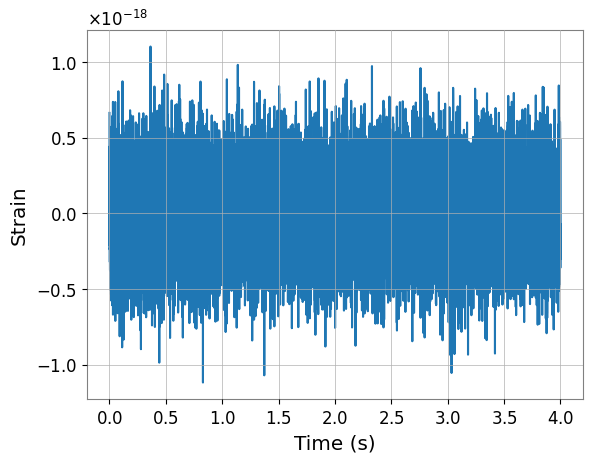

In [30]:
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 4 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(4 / delta_t)
noise = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
noise *= 1e3

plt.plot(noise.sample_times, noise)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()

noise1 = TimeSeries.from_pycbc(noise)

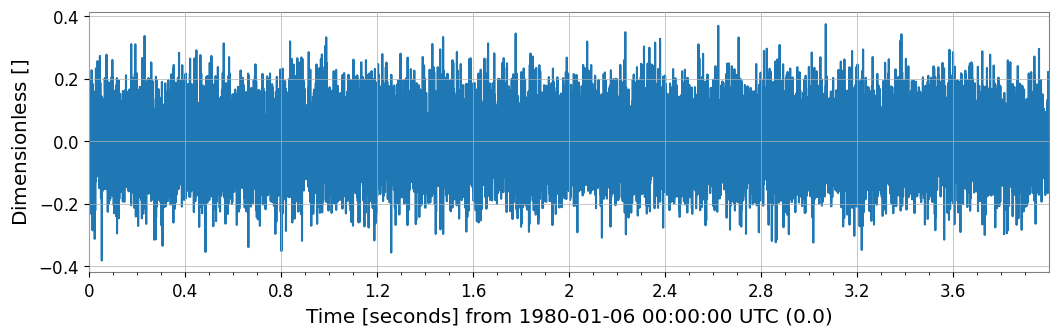

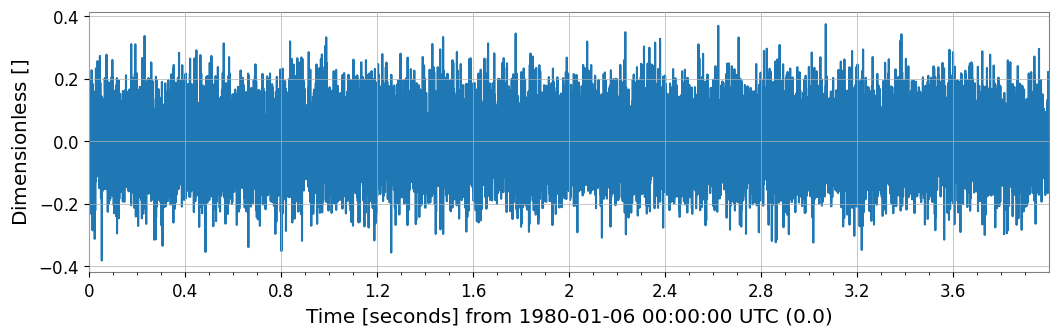

In [34]:
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)

hp, hc = get_td_waveform(approximant="SEOBNRv2",                                
                         mass1=bbh_two_mass_samples[0][0],
                         mass2=bbh_two_mass_samples[0][1],
                         delta_t=1.0/4096,
                         f_lower=40)

signal = TimeSeries.from_pycbc(hp)
signal.t0 = 1
# signal.plot()

noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096) 
noise1 = (noise)
# noise1.plot()

merged_bbh = noise1.inject(signal)
merged_bbh.plot()

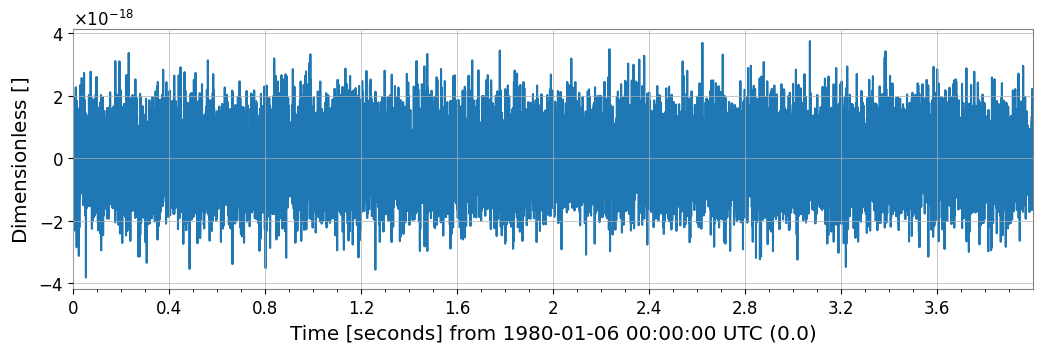

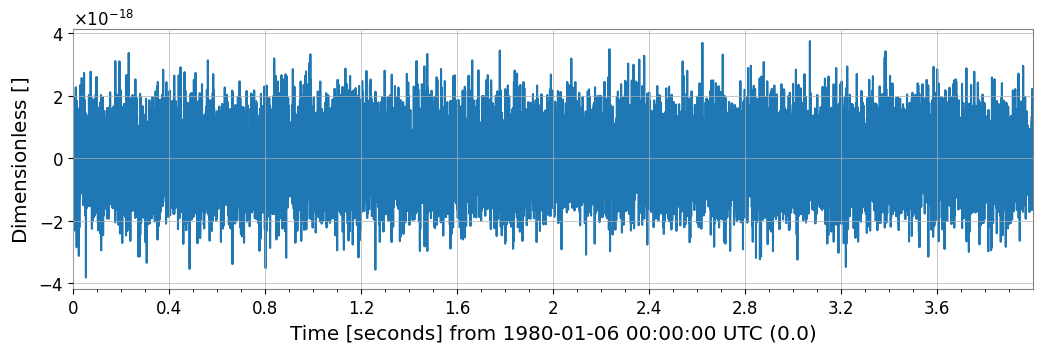

In [48]:
noise1 = noise * 1e-17
merged_bbh = noise1.inject(signal)
merged_bbh.plot()

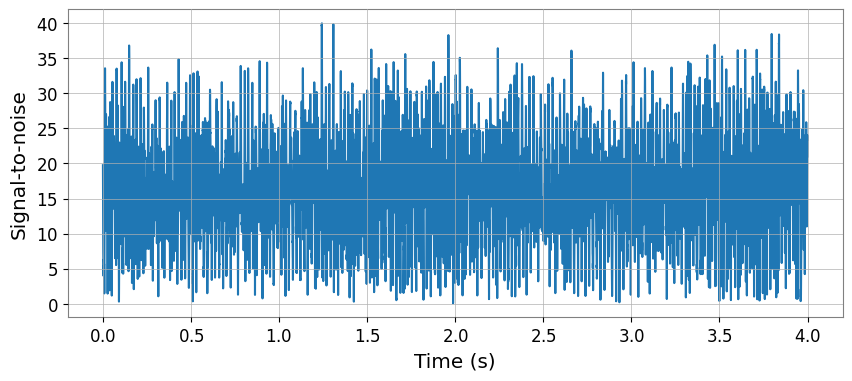

We found a signal at 1.2431640625s with SNR 39.95975716465831


In [49]:
hp.resize(len(merged_bbh))
hp = hp.cyclic_time_shift(hp.start_time)
# high = merged_bbh.highpass(15)
psd = merged_bbh.psd()

snr = matched_filter(hp, merged_bbh.to_pycbc(), psd=psd.to_pycbc(),
                     low_frequency_cutoff=15)
snrts = TimeSeries.from_pycbc(snr).abs()

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
# pylab.ylim(0, 100)
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

Whitening

[(49.03200885, 31.89186866)]


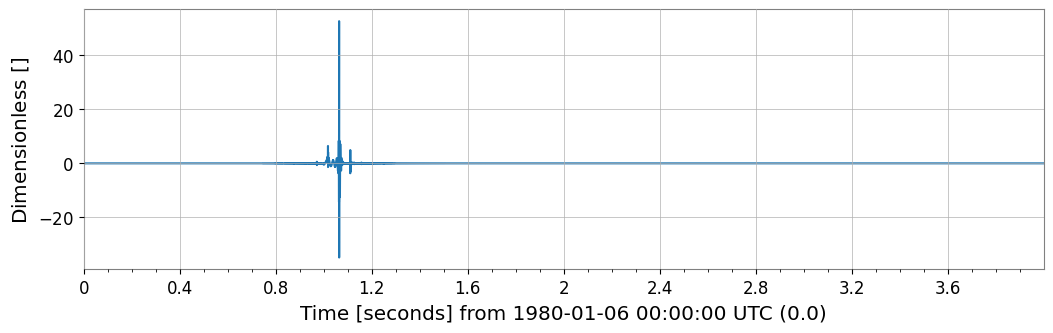

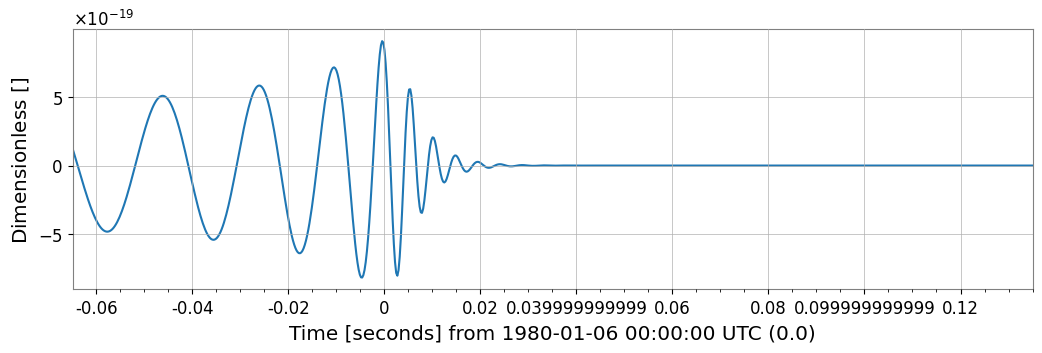

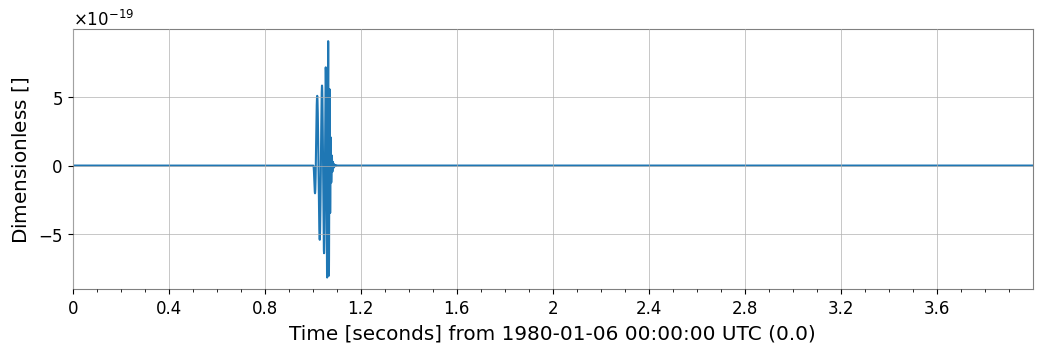

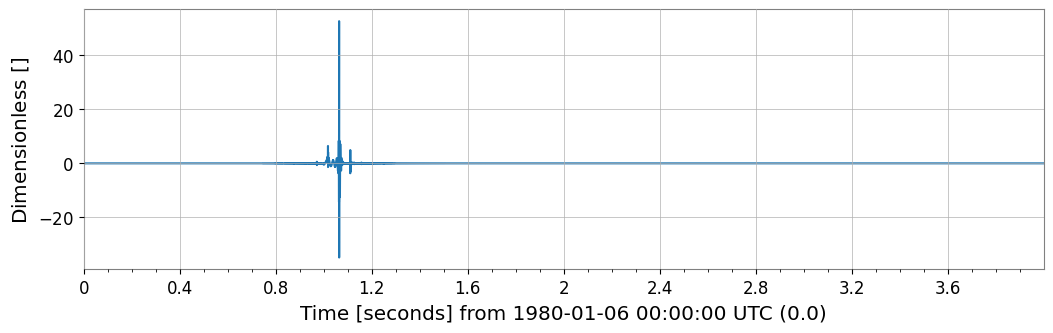

In [55]:
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))
bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)
print(bbh_two_mass_samples)

hp, hc = get_td_waveform(approximant='SEOBNRv2',
                                mass1=bbh_two_mass_samples[0][0],
                                mass2=bbh_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

# plt.plot(hp.sample_times, hp, label='SEOBNRv2')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

signal = TimeSeries.from_pycbc(hp)
signal.plot()

signal = signal.taper()
signal.t0 = 1

noise = TimeSeries([0.0 for i in range(16384)], sample_rate=4096)
noise *= 1e-18
data = noise.inject(signal)
data.plot()
white = data.whiten()
white.plot()

In [56]:
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)

hp, hc = get_td_waveform(approximant="SEOBNRv2",                                
                         mass1=bbh_two_mass_samples[0][0],
                         mass2=bbh_two_mass_samples[0][1],
                         delta_t=1.0/4096,
                         f_lower=40)

st = 1
signal = TimeSeries.from_pycbc(hp)
signal.t0 = st

noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)

In [59]:
s1 = signal/(max(signal.max(), np.abs(signal.min()))/0.2)

d1 = noise.inject(s1)

# Whitening after injection

s2 = signal/(max(signal.max(), np.abs(signal.min()))/0.2)
tmp2 = noise.inject(s2)

d2 = tmp2.whiten()
d2 /= 10

# Whitening only signal before injection

n3 = TimeSeries([0.0 for i in range(16384)], sample_rate=4096)
tmp3 = n3.inject(signal)
tmp3 = tmp3.whiten()
s3 = tmp3/(max(tmp3.max(), np.abs(tmp3.min()))/0.2)

d3 = noise.inject(s3)

# Whitening only noise before injection

tmp4 = (noise.whiten())/10

s4 = signal/(max(signal.max(), np.abs(signal.min()))/0.2)

d4 = tmp4.inject(s4)

# Whitening both before injection

tmp5 = (noise.whiten())/10

n5 = TimeSeries([0.0 for i in range(16384)], sample_rate=4096)
tmp6 = n5.inject(signal)
tmp6 = tmp6.whiten()
s5 = tmp6/(max(tmp6.max(), np.abs(tmp6.min()))/0.2)

d5 = tmp5.inject(s5)

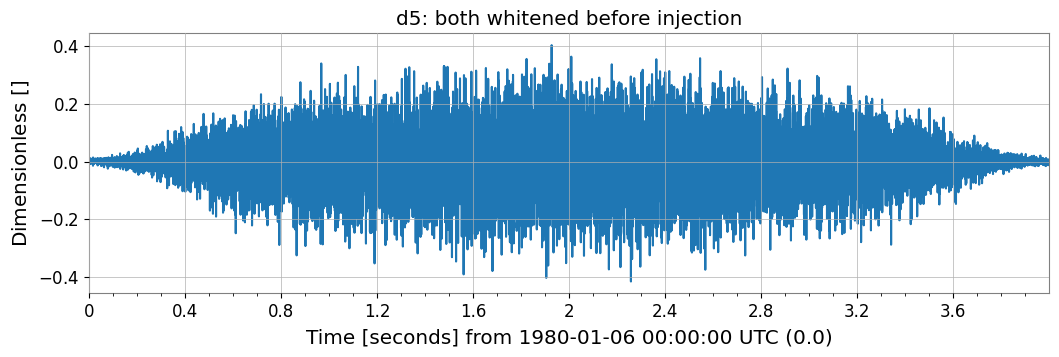

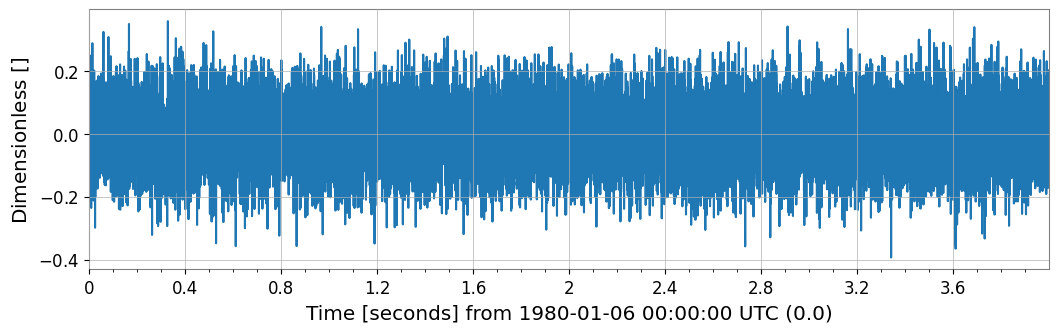

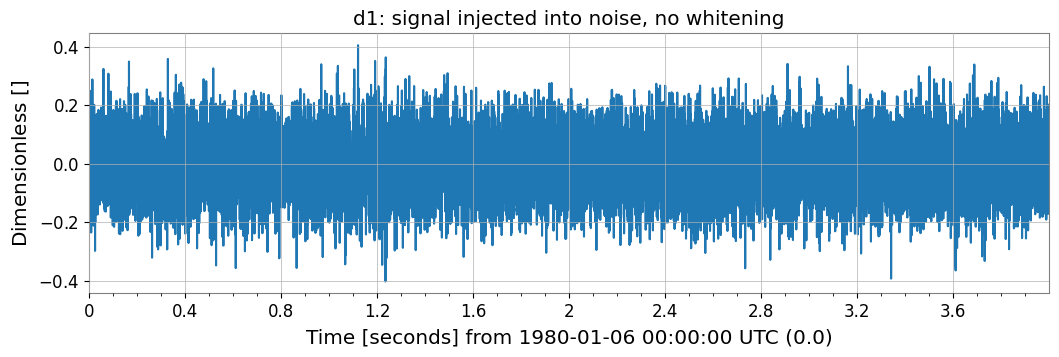

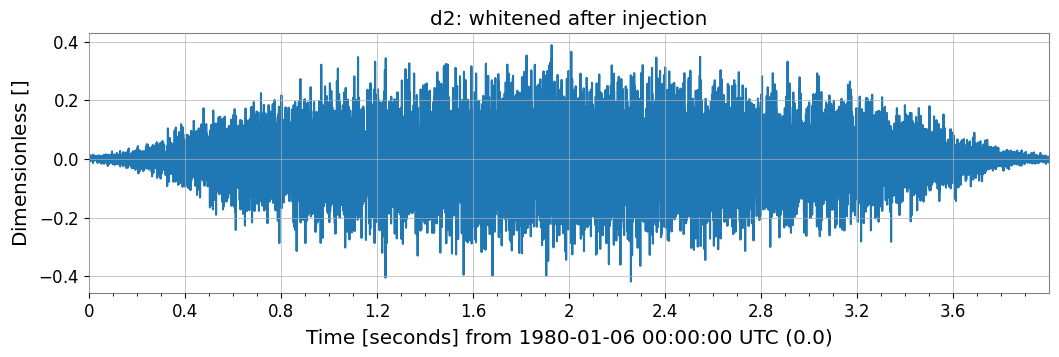

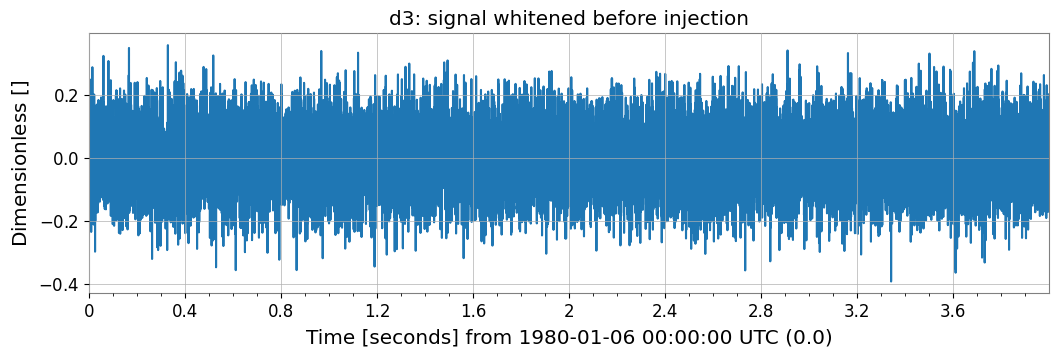

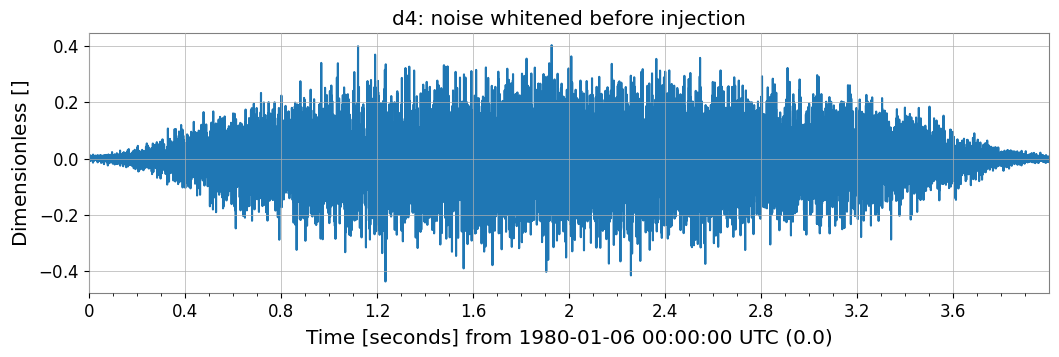

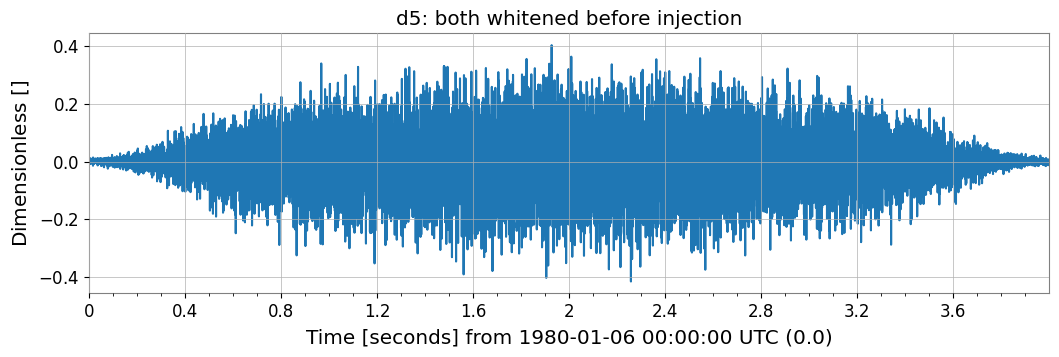

In [66]:
noise.plot()
d1.plot(title="d1: signal injected into noise, no whitening")
d2.plot(title="d2: whitened after injection")
d3.plot(title="d3: signal whitened before injection")
d4.plot(title="d4: noise whitened before injection")
d5.plot(title="d5: both whitened before injection")

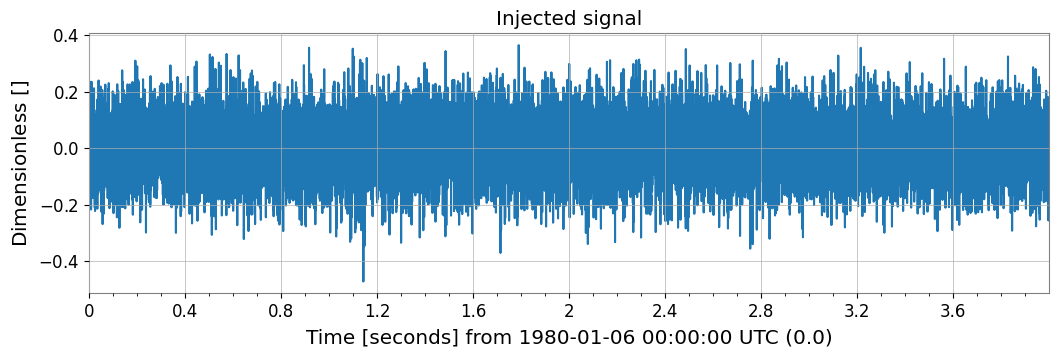

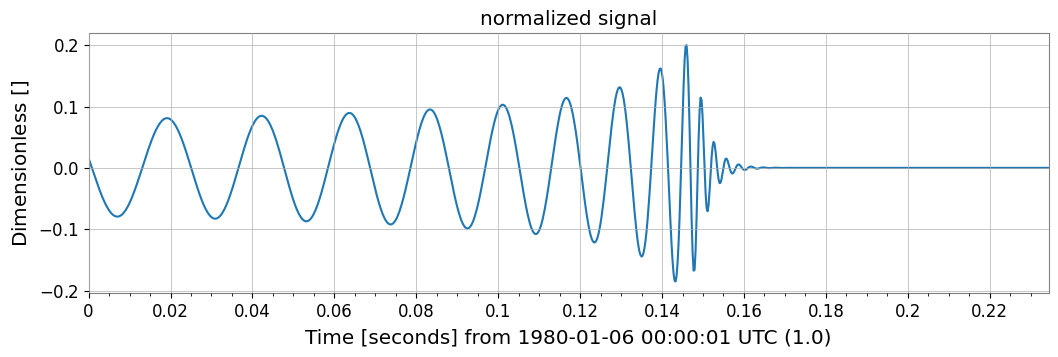

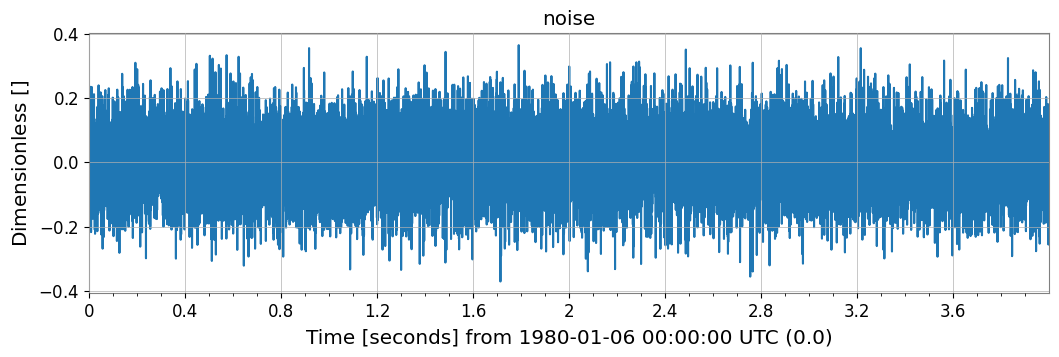

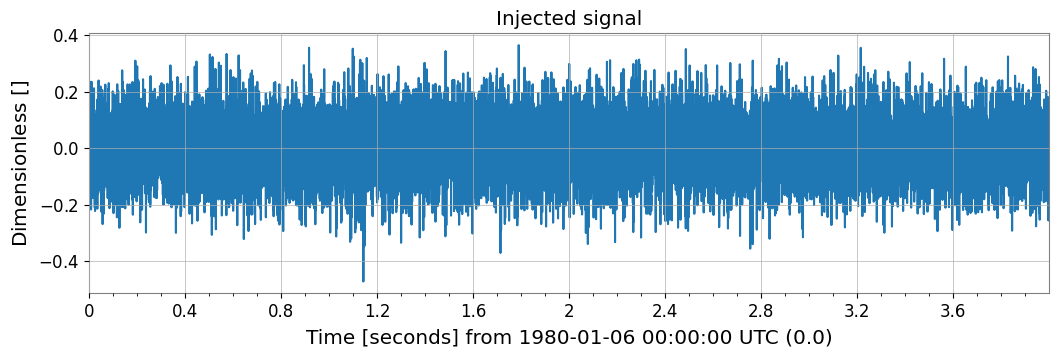

In [67]:

bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)

hp, hc = get_td_waveform(approximant="SEOBNRv2",                                
                         mass1=bbh_two_mass_samples[0][0],
                         mass2=bbh_two_mass_samples[0][1],
                         delta_t=1.0/4096,
                         f_lower=40)

st = 1
signal = TimeSeries.from_pycbc(hp)
signal.t0 = st

noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)

s1 = signal/(max(signal.max(), np.abs(signal.min()))/0.2)

d1 = noise.inject(s1)

s1.plot(title = "normalized signal")
noise.plot(title = "noise")
d1.plot(title = "Injected signal")

In [68]:
a = np.random.normal(scale = .1, size = 16384)
print(a, a.shape, np.mean(a), np.std(a))

[-0.05239749  0.08464301 -0.1417923  ... -0.24428658 -0.05641389
  0.09931397] (16384,) 0.0002488287233734195 0.09911870399002515


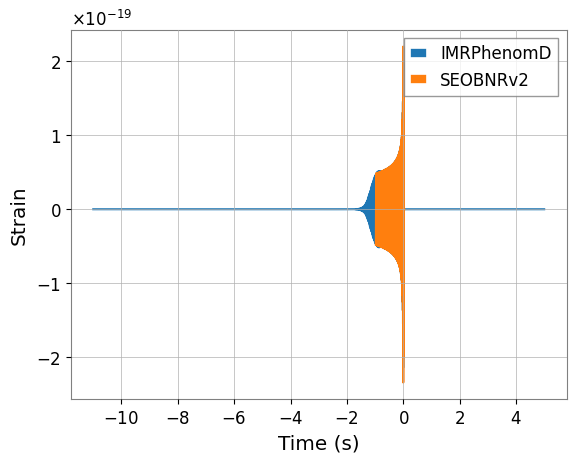

In [69]:

for apx in ['IMRPhenomD',"SEOBNRv2"]:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    plt.plot(hp.sample_times, hp, label=apx)

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

1.583543298919191 1.1101926025001339


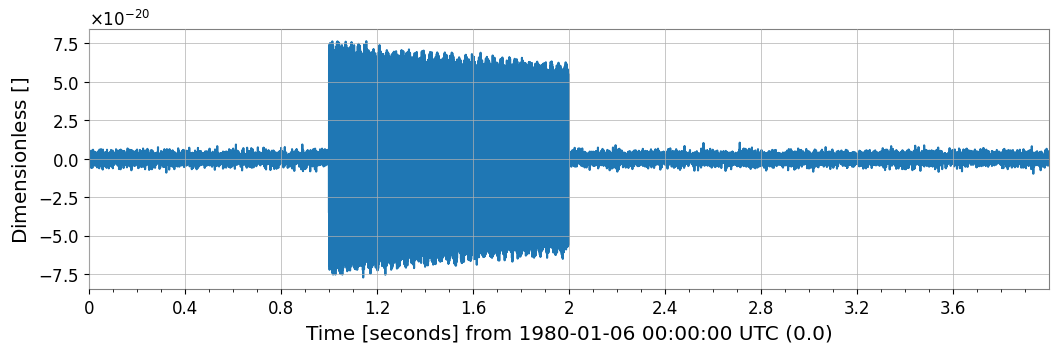

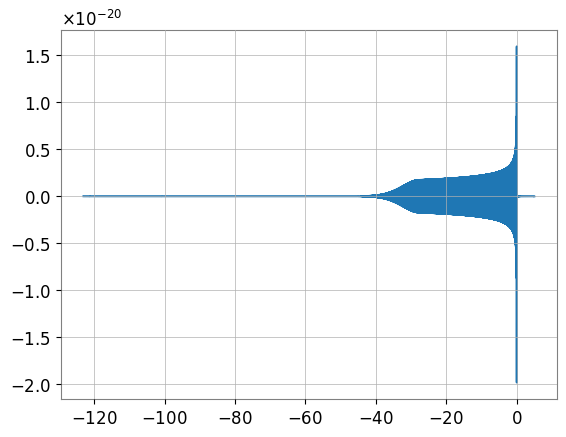

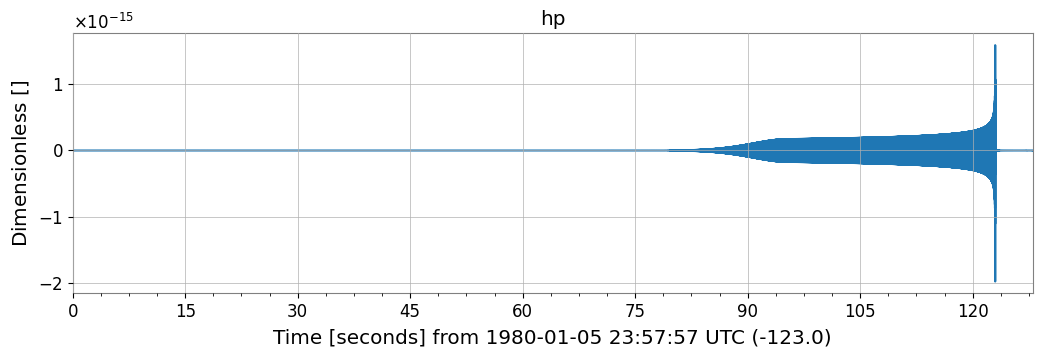

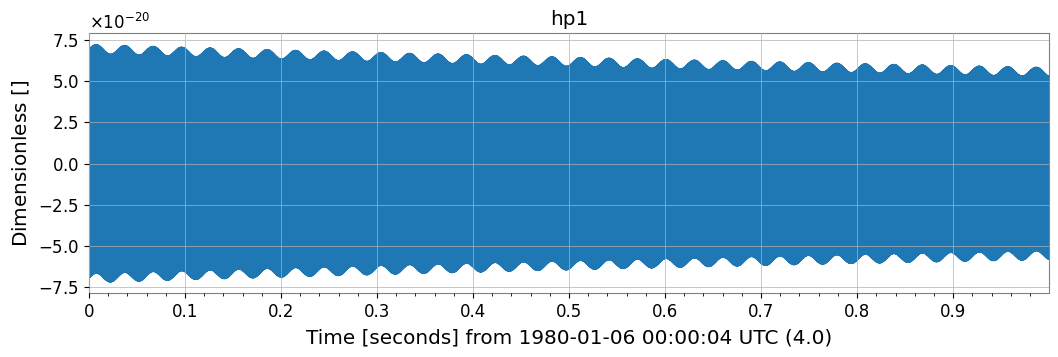

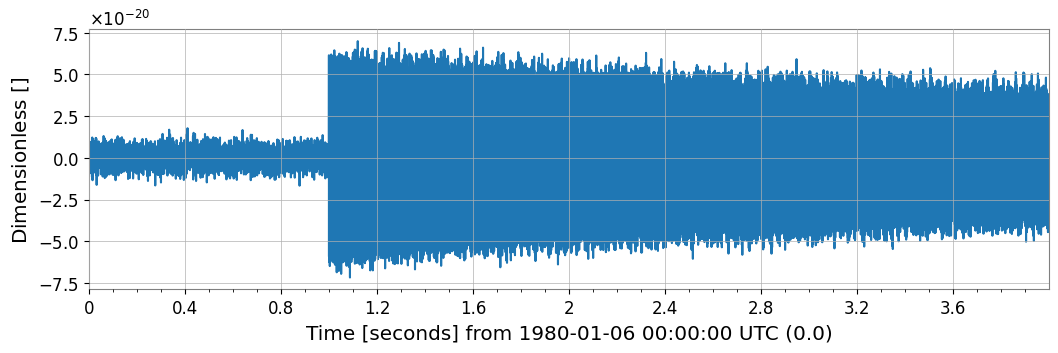

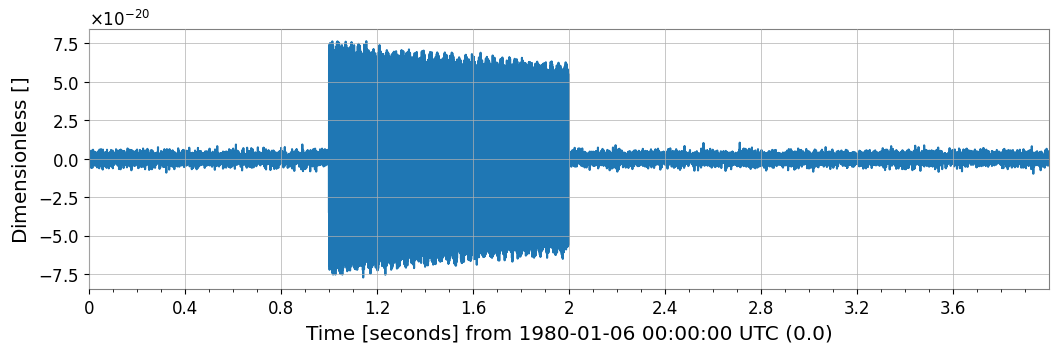

In [7]:
bns_two_mass_distributions = distributions.Uniform(mass1=(1, 2),
                                               mass2=(1, 2))

bns_two_mass_samples = bns_two_mass_distributions.rvs(size=1)
print(bns_two_mass_samples[0][0], bns_two_mass_samples[0][1])

hp, hc = get_td_waveform(approximant='IMRPhenomPv2_NRTidal',
                                mass1=bns_two_mass_samples[0][0],
                                mass2=bns_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

hp.plot()
t = hp.get_end_time()
hp1 = hp.time_slice(t-1, t)

signal = TimeSeries.from_pycbc(hp)*1e5
signal1 = TimeSeries.from_pycbc(hp1)*1e5

signal.plot(title = "hp")
signal1.plot(title = "hp1")

signal.t0 = 1
# signal.plot()

signal1.t0 = 1
# signal1.plot()

noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)
noise *= 1e-19
noise /= 2

data = noise.inject(signal)
data.plot()

signal1 = signal1.taper()
# signal1.plot()

noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)
noise *= 1e-19
noise /= 4

data = noise.inject(signal1)
data.plot()

[(43.97778765, 40.12712037)]


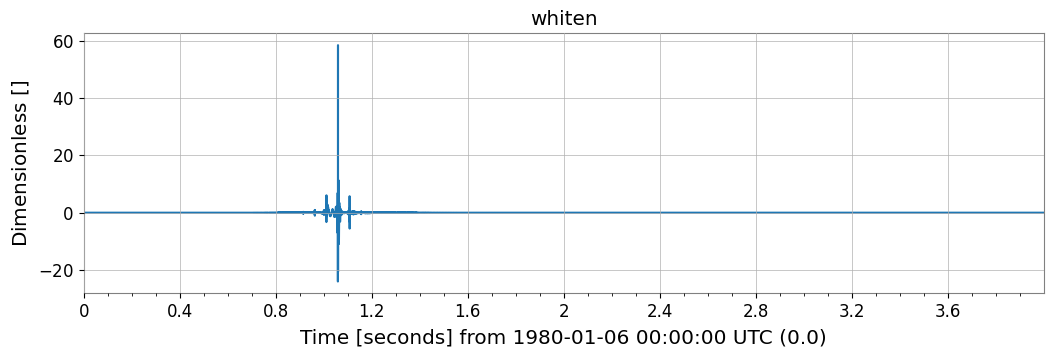

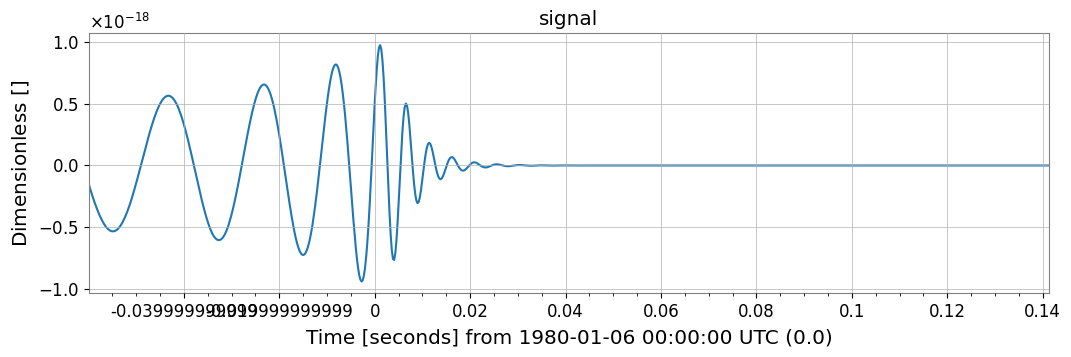

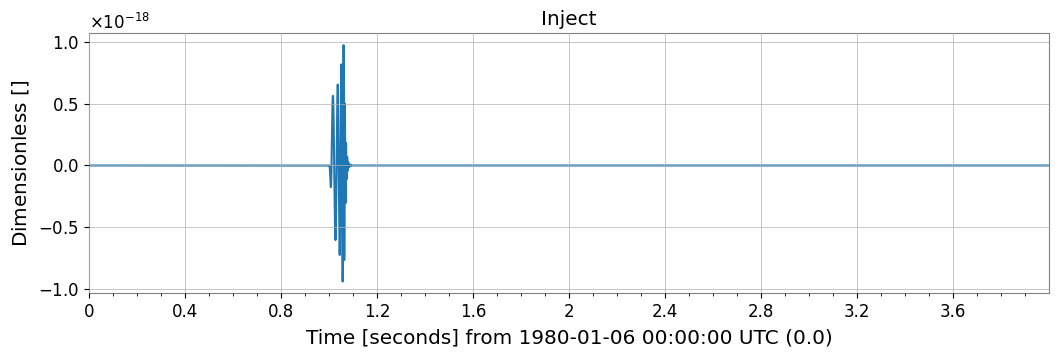

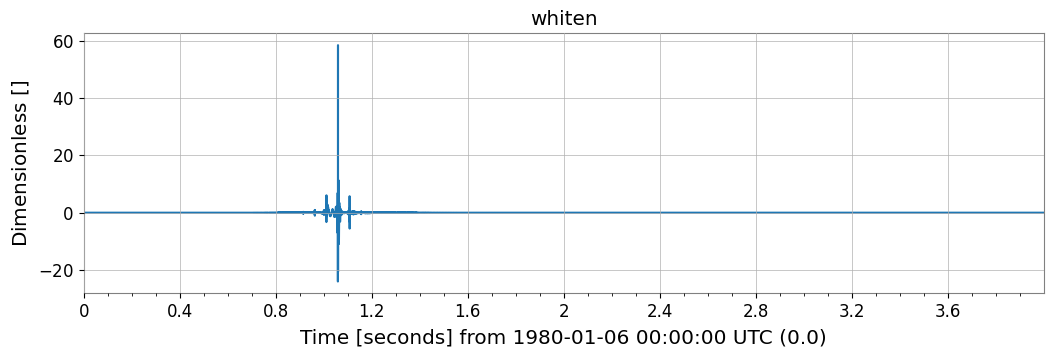

In [10]:
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))
bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)
print(bbh_two_mass_samples)

hp, hc = get_td_waveform(approximant='SEOBNRv2',
                                mass1=bbh_two_mass_samples[0][0],
                                mass2=bbh_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

signal = TimeSeries.from_pycbc(hp)
signal.plot(title = "signal")

signal = signal.taper()
signal.t0 = 1

noise = TimeSeries([0.0 for i in range(16384)], sample_rate=4096)
noise *= 1e-18
data = noise.inject(signal)
data.plot(title ="Inject")
white = data.whiten()
white.plot(title= "whiten")

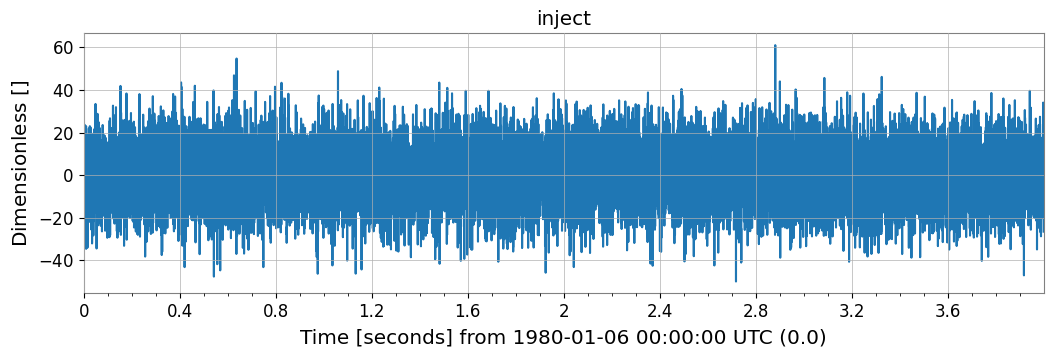

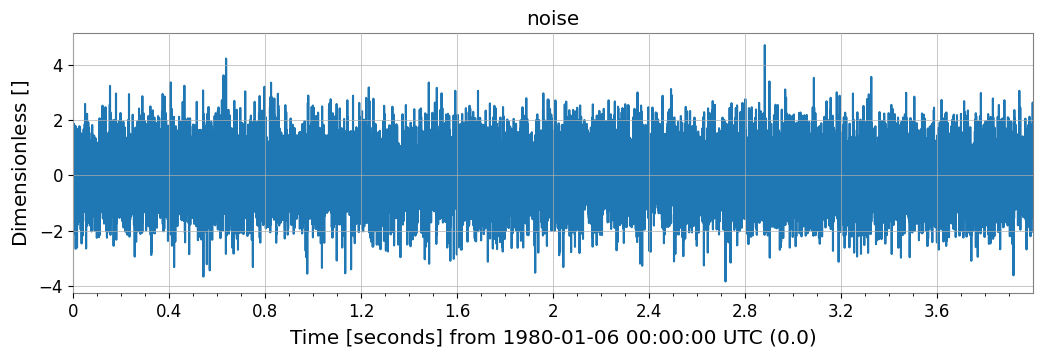

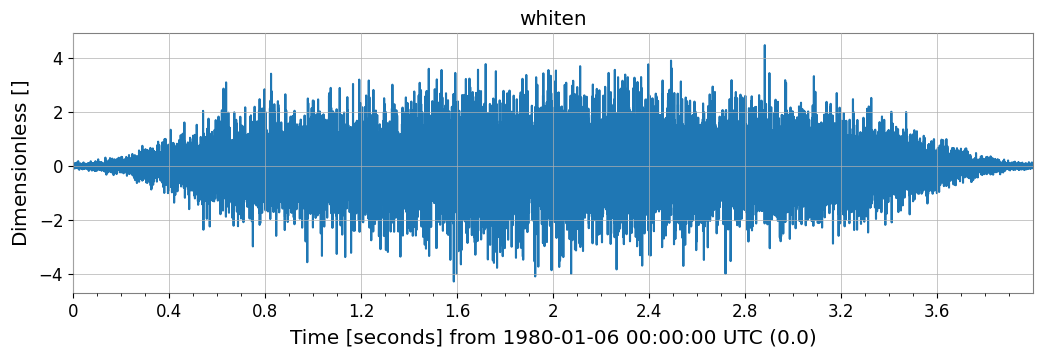

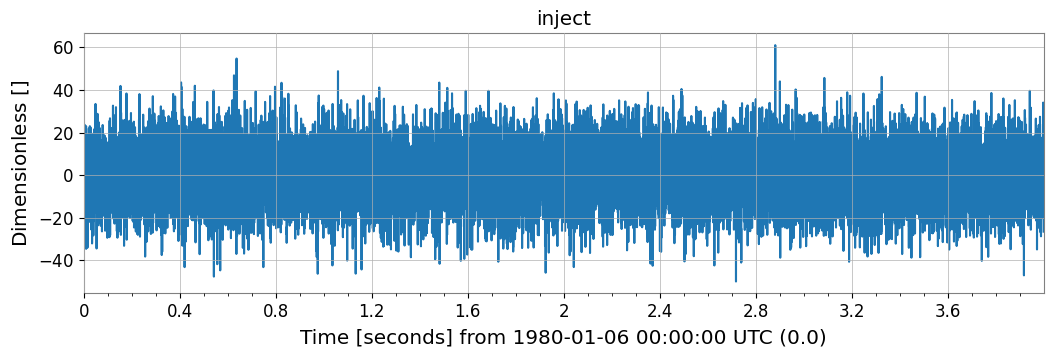

In [13]:
noise = TimeSeries(np.random.normal(scale=1, size=16384), sample_rate=4096)    # did not understand clearly
noise.plot(title = "noise")    
noise *= 13
white1 = noise.whiten()
white1.plot(title = "whiten")

data1 = noise.inject(white)
data1.plot(title = "inject")

Dealing with actual signal

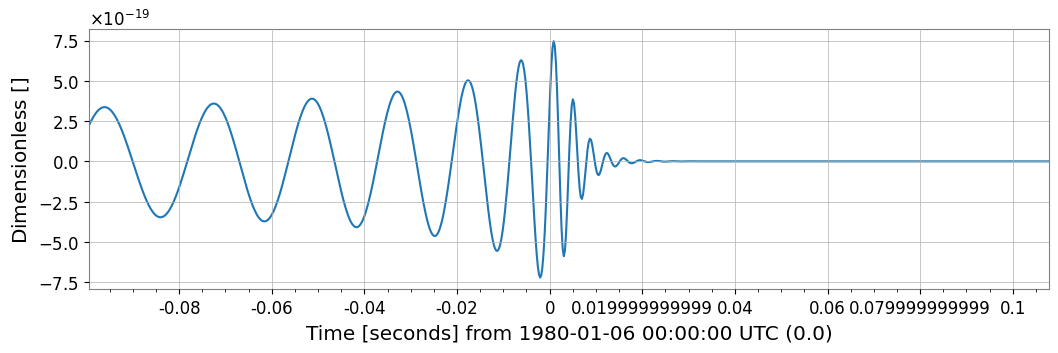

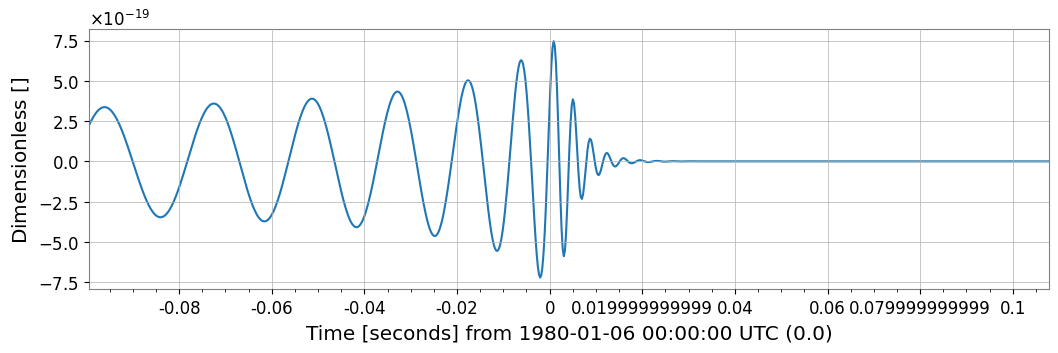

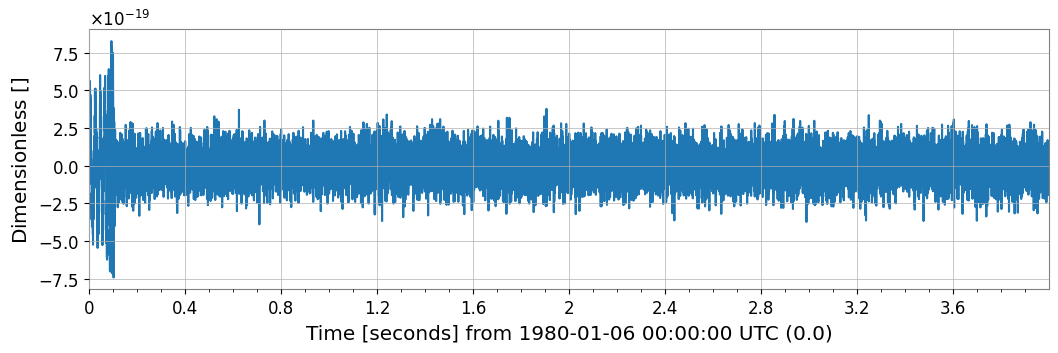

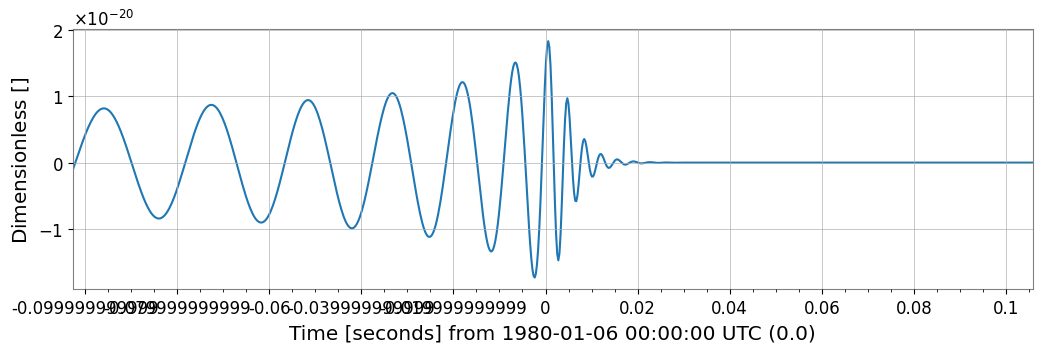

In [14]:
i = 4533

bbh = TimeSeries.read("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/BBH/bbh_4k_"+str(i)+".txt")
fig1 = bbh.plot()

noise = TimeSeries.read("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise_template/noise_4k_"+str(i)+".txt")
fig1 = noise.plot()

merged_bbh = TimeSeries.read("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise-injected-signal/merged_noise_signal_"+str(i)+".txt")
fig1 = merged_bbh.plot()

merged_bns = TimeSeries.read("C:/Users/sunda/Documents/Github/Gravitational Wave Detection/scripts/raw-data-files/noise-injected-signal_BNS/bns_merged_noise_signal_"+str(0)+".txt")
fig1 = merged_bns.plot()

  0%|          | 0/200 [00:00<?, ?it/s]

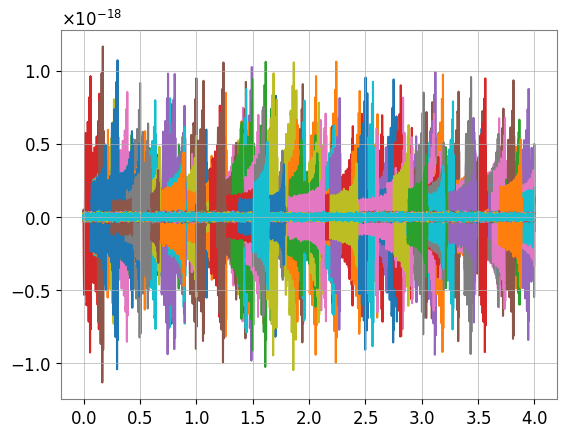

In [4]:
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=200)

for i in tqdm(range(len(bbh_two_mass_samples))):
    hp, hc = get_td_waveform(approximant="SEOBNRv2",                               
                         mass1=bbh_two_mass_samples[i][0],
                         mass2=bbh_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)                                                

    noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)   
    noise= noise*1e-19
    
    signal = TimeSeries.from_pycbc(hp)
    st = np.random.randint(0,64)
    
    signal.t0 = 0.0625*st #### Keep dividing 0.5 by 2, you can go beyond 0.0625 too (try 0.0625/2)
    data = noise.inject(signal)

    plt.plot(data)